In [2]:
!pip install scikit-learn

In [3]:
!pip install sentence_transformers

  Using cached sentence-transformers-2.2.2.tar.gz (85 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.4 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=8c2921cb929c239d14f3c517a35186706b7c1581232bd5c2ab64181156d7d502
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [4]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [5]:
data = {
    'Age': [25, 30, 35],
    'Gender': ['Male', 'Female', 'Male'],
    'Role': ['Developer', 'Manager', 'Analyst'],
    'HiringDepartment': ['Engineering', 'HR', 'Finance'],
    'TravelPreference': ['Yes', 'No', 'Yes'],
    'ExtraCurriculars': ['Sports', 'Music', 'Art'],
    'DistanceFromHome': [10, 20, 30],
    'Internships': [2, 1, 3],
    'EducationLevel': ['Bachelor', 'Master', 'PhD'],
    'EducationField': ['CS', 'Business', 'Economics'],
    'Summary': ['Experienced developer...', 'HR manager with...', 'Analyst specializing in...']
}


In [6]:
model = SentenceTransformer('sentence-transformers/paraphrase-MiniLM-L6-v2')


In [7]:
def compile_text(x):
    text = (
        f"Age: {x['Age']} Gender: {x['Gender'].lower()} Role: {x['Role']} "
        f"Hiring Department: {x['HiringDepartment']} "
        f"Travel Preference: {x['TravelPreference']} Extracurriculars: {x['ExtraCurriculars']} "
        f"Distance From Home: {x['DistanceFromHome']} "
        f"Internships: {x['Internships']} Education Level: {x['EducationLevel']} Education Field: {x['EducationField']} "
        f"Summary: {x['Summary']}"
    )
    return text

In [8]:
def output_embedding(txt):
    embd = model.encode(txt)
    return embd

In [9]:
df = pd.DataFrame(data)
df['combined_text'] = df.apply(lambda x: compile_text(x), axis=1)
df['embedding'] = df['combined_text'].apply(lambda x: output_embedding(x))


In [10]:
embeddings = np.array(df['embedding'].tolist())
kmeans = KMeans(n_clusters=3).fit(embeddings)
df['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


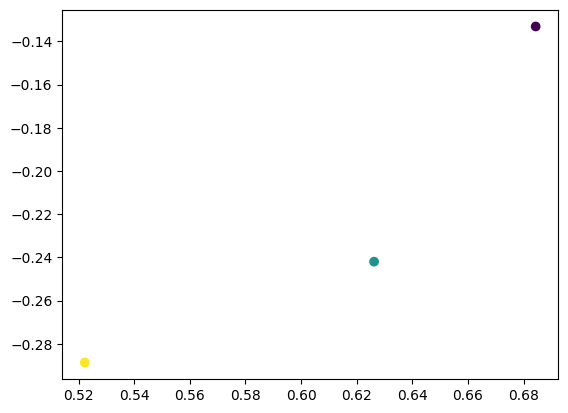

In [11]:
import matplotlib.pyplot as plt

plt.scatter(embeddings[:, 0], embeddings[:, 1], c=df['cluster'], cmap='viridis')
plt.show()